# 추론 통계

In [1]:
import numpy as np
import pandas as pd

#시각화 패키지
import matplotlib.pyplot as plt
import seaborn as sns

#통계 관련 패키지
import scipy as sp
import scipy.stats

#시각화에서 한글을 사용하기 위한 설정
import platform
from matplotlib import font_manager, rc

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
#윈도우의 경우
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
    
#시각화에서 음수를 표현하기 위한 설정
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False 

# Jupyter Notebook의 출력을 소수점 이하 3자리로 제한 
%precision 3
# DataFrame의 출력을 소수점 이하 3자리로 제한 
pd.set_option('precision', 3)

## 통계적 유의성

In [5]:
import random
# 유의 확률(p-value)을 계산해주는 사용자 정의 함수
# 대부부의 경우는 이 함수를 직접 생성하지 않습니다. 

#재표본 추출을 이용해서 새로 추출된 데이터의 평균의 차를 구해주는 함수
def perm_fun(x, nA, nB):
    #2개의 시행 횟수를 전부 합침
    n = nA + nB
    
    idx_B = set(random.sample(range(n), nB))
    idx_A = set(range(n)) - idx_B
    
    return x.loc[idx_B].mean() - x.loc[idx_A].mean()

#전환율의 차이를 계산
obs_pct_diff = 100 * (200 / 23739 - 182 / 22588)
print('전환율 차이:', obs_pct_diff, '%')

#부트스트래핑을 위한 작업
conversion = [0] * 45945  #전환되지 않은 경우
conversion.extend([1] * 382) #전환한 경우

conversion = pd.Series(conversion) #앞의 list를 Series로 변환

#여러번 샘플링 해서 평균의 차이를 계산
random.seed(42)
perm_diffs = [100 * perm_fun(conversion, 23739, 22588) for _ in range(1000)]

print(np.mean([diff > obs_pct_diff for diff in perm_diffs]))

# 32% 정도가 극단적인 결과임 - 이부분은 카이 제곱 검정을 통해서 수행 가능

전환율 차이: 0.03675791182059275 %
0.322


## 동전을 15번 던졌을 때 12번 나온 경우에 대한 검정

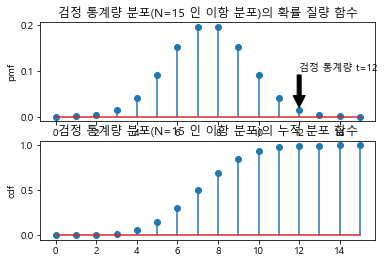

0.03515625
0.017578125


In [9]:
# 시행 횟수
N = 15

#이 동전이 공정하다면 각각의 확률은 0.5
#1이 나올 확률
mu = 0.5

#이항 분포 객체를 생성
rv = sp.stats.binom(N, mu)

#시뮬레이션을 위한 범위를 설정
xx = np.arange(N+1)


#확률 질량 함수 그리기 - 이산 확률 변수에서 각각의 값이 나올 확률
plt.subplot(211)
plt.stem(xx, rv.pmf(xx))
plt.ylabel("pmf")
plt.title("검정 통계량 분포(N=15 인 이항 분포)의 확률 질량 함수")
plt.annotate("검정 통계량 t=12", xy=(12, 0.02), xytext=(12, 0.1),
            arrowprops={"facecolor":"black"})


#누적 분포 함수 그리기 - 현재값까지 나올 확률
plt.subplot(212)
plt.stem(xx, rv.cdf(xx))
plt.ylabel("cdf")
plt.title("검정 통계량 분포(N=15 인 이항 분포)의 누적 분포 함수")

plt.show()


#귀무 가설은 이 동전은 공정하다 - 1이 나올 확률은 0.5
#대립 가설은 이 동전은 공정하지 않다. - 1이 나올 확률이 0.5 가 아니다
#유의 확률 - 15번 던졌을 때 12번 이상이 나올 확률
#양측 검정
print(2 * (1 - rv.cdf(11))) # 11번 나올 때 까지의 누적 확률을 1에서 뺌
# 결과는 0.03515625

# 유의 수준이 5% 라면 유의 확률이 유의 수준보다 작기 때문에 귀무 가설을 기각
# 이 동전은 공정하지 않다.

# 유의 수준이 1% 라면 유의 확률이 유의 수준보다 크기 때문에 귀무 가설을 기각할 수 없음
# 이 동전은 공정하고 이런 결과가 나올 수 도 있다.


#단측 검정
#이 동전은 앞면이 나올 가능성이 높다.
print(1 - rv.cdf(11))
#유의 확률: 0.017578125

## 이항 검정 - 총 시도 횟수 10번 중 1이 7번 나왔을 때 유의 확률

In [11]:
np.random.seed(42)
x = sp.stats.binom_test(7, 10)
print(x)
#유의 확률이 34.375 %

#유의 수준을 얼마로 잡던 유의 확률이 크기 때문에 귀무 가설을 기각할 수 없음
#이런 경우가 발생할 수 도 있음


0.34375


## 이항 검정
### tips 데이터에서 여자 손님 중 비흡연자가 흡연자보다 많다고 할 수 있는지 유의 수준 10%로 검정

In [22]:
# 데이터 가져오기
tips = sns.load_dataset('tips')
#tips.info()

#여자 손님 - sex 가 Female
female = tips[tips['sex'] == 'Female']
#female

female_cnt = female['sex'].count()
#female_cnt

#흡연여부  - smoker 속성이 No 이면 비흡연 그렇지 않으면 흡연
non_smoke_cnt = female[female['smoker'] == 'No'].count()
non_smoke_cnt[0]

#여자 손님의 수 그리고 여자 손님 중 흡연자 와 비흡연자의 수를 알아야 함

x = sp.stats.binom_test(non_smoke_cnt[0], female_cnt)
#print(x)

if x < 0.1 :
    print("귀무 가설 기각")
    if non_smoke_cnt[0] > (female_cnt/2):
        print("비흡연자의 비율이 높습니다.")
    else:
        print("비흡연자의 비율이 낮습니다.")
else:
    print("귀무 가설 채택")

귀무 가설 기각
비흡연자의 비율이 높습니다.


## t 검정

### 단일 표본 t-검정

In [28]:
#평균이 0인 정규 분포를 가진 확률 변수의 데이터 10개 생성
np.random.seed(0)
x = sp.stats.norm(0).rvs(10)
print(x)

#유의 수준을 5%를 적용하게 되면 귀무 가설 기각 - 평균은 0이 아니다
print(sp.stats.ttest_1samp(x, popmean=0))

#샘플의 개수를 늘리면 유의 확률이 높아집니다.
x = sp.stats.norm(0).rvs(100)
print(sp.stats.ttest_1samp(x, popmean=0))

[ 1.764  0.4    0.979  2.241  1.868 -0.977  0.95  -0.151 -0.103  0.411]
Ttest_1sampResult(statistic=2.28943967238967, pvalue=0.04781846490857058)
Ttest_1sampResult(statistic=0.17790267778528734, pvalue=0.8591629200406918)


In [33]:
#tdata.csv 파일을 읽어서 성적의 평균이 75점이라고 할 수 있는지
#유의 수준 5%로 양측 검정

tdata = pd.read_csv('./data/tdata.csv', encoding='cp949')
#tdata.info()

result = sp.stats.ttest_1samp(tdata['성적'], popmean=75).pvalue

if result > 0.05:
    print("귀무 가설을 채택해서 평균이 75라고 할 수 있습니다.")
else:
    print("귀무 가설을 기각해서 평균이 75라고 할 수 없습니다.")

귀무 가설을 채택해서 평균이 75라고 할 수 있습니다.


### 독립 표본 t 검정

In [38]:
#서로 다른 10명의 사람에게 수면제 1을 복용했을 때 의 수면 증가 시간과 
#수면제 2를 복용했을 때의 수면 증가 시간이 같은지 비교
#유의 확률 5%로 검정

x1 = np.array([0.7, -1.6, -0.2, -1.2, -0.1, 3.4, 3.7, 0.8, 0.0, 2.0])
x2 = np.array([1.9, 0.8, 1.1, 0.1, -0.1, 4.4, 5.5, 1/6, 4.6, 3.4])

# 2개 데이터의 분산 확인
print(np.var(x1))
print(np.var(x2))

r = sp.stats.ttest_ind(x1, x2, equal_var = False)
if r.pvalue >= 0.05:
    print("귀무 가설을 기각할 수 없어서 2개 데이터의 평균은 같다.")
else:
    print("귀무 가설을 기각해서 2개 데이터의 평균은 다르다.")

2.8805
4.002266666666666
귀무 가설을 기각할 수 없어서 2개 데이터의 평균은 같다.


In [39]:
### 대응 표본 t 검정
#동일한 10명의 사람에게 수면제 1을 복용했을 때 의 수면 증가 시간과 
#수면제 2를 복용했을 때의 수면 증가 시간이 같은지 비교
#유의 확률 5%로 검정

x1 = np.array([0.7, -1.6, -0.2, -1.2, -0.1, 3.4, 3.7, 0.8, 0.0, 2.0])
x2 = np.array([1.9, 0.8, 1.1, 0.1, -0.1, 4.4, 5.5, 1/6, 4.6, 3.4])

r = sp.stats.ttest_rel(x1, x2)
if r.pvalue >= 0.05:
    print("귀무 가설을 기각할 수 없어서 2개 데이터의 평균은 같다.")
else:
    print("귀무 가설을 기각해서 2개 데이터의 평균은 다르다.")

귀무 가설을 기각해서 2개 데이터의 평균은 다르다.


## 윌콕슨의 부호 순위 검정

In [40]:
### 데이터 가져오기
training_rel = pd.read_csv('./data/training_rel.csv')
toy_df = training_rel[:6].copy()
toy_df

,전,후
0,59,41
1,52,63
2,55,68
3,61,59
4,59,84
5,45,37


In [41]:
### 데이터의 차이 확인
diff = toy_df['후'] - toy_df['전']
toy_df['차'] = diff
toy_df

,전,후,차
0,59,41,-18
1,52,63,11
2,55,68,13
3,61,59,-2
4,59,84,25
5,45,37,-8


In [42]:
### 차아의 절대값을 가지고 순위를 생성
rank = sp.stats.rankdata(abs(diff)).astype(int)
toy_df['순위'] = rank
toy_df

,전,후,차,순위
0,59,41,-18,5
1,52,63,11,3
2,55,68,13,4
3,61,59,-2,1
4,59,84,25,6
5,45,37,-8,2


In [44]:
### 차이가 음수 일 때 와 양수 일 때의 순위합을 구함
r_minus = np.sum((diff<0) * rank)
r_plus = np.sum((diff>0) * rank)
print(r_minus, r_plus)

8 13


In [48]:
### 데이터에 변화가 발생한 경우에 순위 합을 확인
toy_df['후'] = toy_df['전'] + np.arange(1, 7)

#차이 구하기
diff = toy_df['후'] - toy_df['전']

#차이의 절대값을 가지고 순위 구하기
rank = sp.stats.rankdata(abs(diff)).astype(int)

#차이가 음수 일 때 와 양수 일 때의 순위 합을 구하기
r_minus = np.sum((diff<0) * rank)
r_plus = np.sum((diff>0) * rank)

#음의 순위 합 과 양의 순위 합이 차이가 많이 남 - 중앙값이 증가했을 가능성이 높음
print(r_minus, r_plus)

0 21


In [49]:
### 데이터에 변화가 램덤하게 발생한 경우에 순위 합을 확인
toy_df['후'] = toy_df['전'] + [1, -2, 3, -4, 5, -6]

#차이 구하기
diff = toy_df['후'] - toy_df['전']

#차이의 절대값을 가지고 순위 구하기
rank = sp.stats.rankdata(abs(diff)).astype(int)

#차이가 음수 일 때 와 양수 일 때의 순위 합을 구하기
r_minus = np.sum((diff<0) * rank)
r_plus = np.sum((diff>0) * rank)

#음의 순위 합 과 양의 순위 합이 차이가 거의 나지 않음 - 중앙값이 변했을 가능성이 낮음
print(r_minus, r_plus)

12 9


In [50]:
T, p = sp.stats.wilcoxon(training_rel['전'], training_rel['후'])
print("유의 확률:", p)

유의 확률: 0.03623390197753906


## 만 위트니의 U 검정

In [51]:
training_rel = pd.read_csv('./data/training_ind.csv')
toy_df = training_rel[:6].copy()
toy_df

,A,B
0,47,49
1,50,52
2,37,54
3,60,48
4,39,51
5,45,52


In [52]:
# 데이터 전체에서 순위를 구함
rank = sp.stats.rankdata(np.concatenate([toy_df['A'], toy_df['B']]))
rank_df = pd.DataFrame({'A':rank[:5], 'B':rank[5:10]}).astype(int)
print(rank_df)

    A   B
0   4   3
1   7   6
2   1   9
3  12  11
4   2   5


In [53]:
# A 열의 순위 합을 구함
n1 = len(rank_df['A'])
u = rank_df['A'].sum() - (n1 * (n1 + 1)) / 2
u

11.0

In [55]:
u, p = sp.stats.mannwhitneyu(training_rel['A'], training_rel['B'],
                            alternative='two-sided')
print(p)

0.05948611166127324


## 음주 데이터 분석

### 데이터를 가져오고 확인

In [56]:
drinks = pd.read_csv('./data/drinks.csv')
drinks.info()
#행은 193개
#컬럼은 6개이고 country 와 continent 는 문자열이고 나머지는 숫자
#continent 에는 23의 NaN이 존재

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     170 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB


### 결측치 처리 - continent 값이 NaN 인 데이터의 값을 OT로 변경 

In [58]:
drinks['continent'] = drinks['continent'].fillna('OT')
drinks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     193 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB


### 상관 분석 - 2개의 숫자 데이터 간의 관련성 파악

In [59]:
corr = drinks[['beer_servings', 'wine_servings']].corr(method = 'pearson')
print(corr)

               beer_servings  wine_servings
beer_servings          1.000          0.527
wine_servings          0.527          1.000


In [61]:
cols = ['beer_servings', 'spirit_servings', 
        'wine_servings', 'total_litres_of_pure_alcohol']
corr = drinks[cols].corr(method='pearson')
print(corr)

                              beer_servings  spirit_servings  wine_servings  \
beer_servings                         1.000            0.459          0.527   
spirit_servings                       0.459            1.000          0.195   
wine_servings                         0.527            0.195          1.000   
total_litres_of_pure_alcohol          0.836            0.655          0.668   

                              total_litres_of_pure_alcohol  
beer_servings                                        0.836  
spirit_servings                                      0.655  
wine_servings                                        0.668  
total_litres_of_pure_alcohol                         1.000  


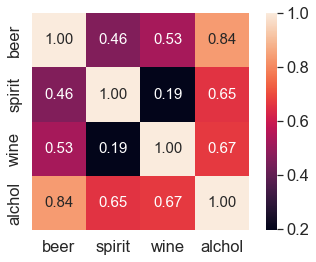

In [62]:
#상관 계수 시각화

#컬럼 이름을 줄여서 작성
cols_view = ['beer', 'spirit', 'wine', 'alchol']
sns.set(font_scale = 1.5)
hm = sns.heatmap(corr.values,
                cbar=True,
                annot=True,
                square=True,
                fmt='.2f',
                annot_kws={'size':15},
                yticklabels=cols_view,
                xticklabels=cols_view)
plt.show()

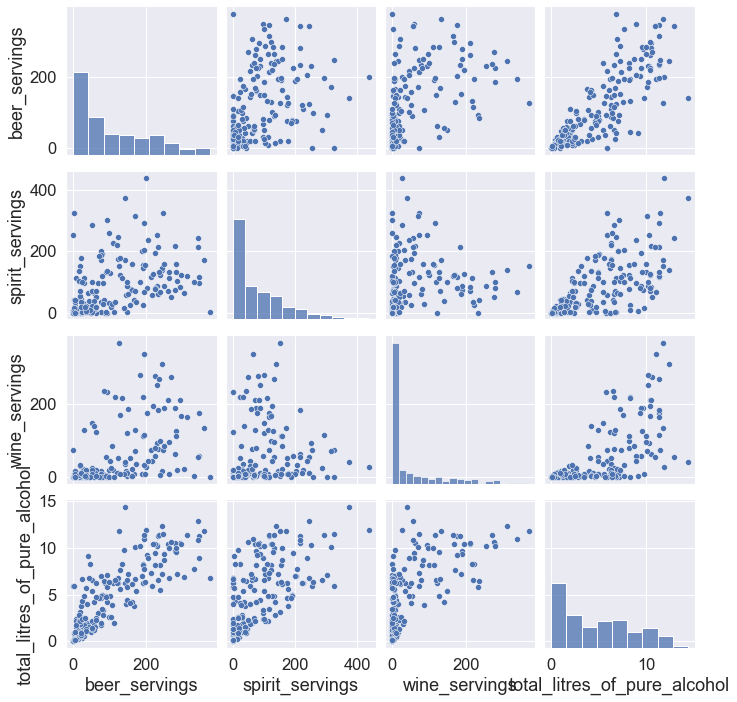

In [63]:
sns.pairplot(drinks[cols], height=2.5)
plt.show()

### 대륙별 데이터 개수 비율 시각화

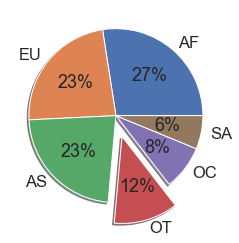

In [67]:
labels = drinks['continent'].value_counts().index.tolist()
fracs = drinks['continent'].value_counts().values.tolist()
#원형 그래프에서 중심 과의 거리
explode = [0, 0, 0, 0.25, 0, 0]

plt.pie(fracs, explode=explode, labels=labels, autopct='%.0f%%', shadow=True)
plt.show()

In [69]:
result = drinks.groupby('continent').spirit_servings.agg(
    ['mean', 'min', 'max', 'sum'])
print(result)

              mean  min  max   sum
continent                         
AF          16.340    0  152   866
AS          60.841    0  326  2677
EU         132.556    0  373  5965
OC          58.438    0  254   935
OT         165.739   68  438  3812
SA         114.750   25  302  1377


In [73]:
#전체 평균보다 알코올을 많이 섭취하는 대륙을 조회

#알코올 평균
total_mean = drinks.total_litres_of_pure_alcohol.mean()

continent_mean = drinks.groupby('continent').
    total_litres_of_pure_alcohol.mean()
    
continent_over_mean = continent_mean[continent_mean >= total_mean]
print(continent_over_mean)

continent
EU    8.618
OT    5.996
SA    6.308
Name: total_litres_of_pure_alcohol, dtype: float64


In [74]:
#맥주를 가장 많이 섭취하는 대륙을 알아보기
beer_continent = drinks.groupby('continent').beer_servings.mean().idxmax()
print(beer_continent)

EU


### 아프리카 와 유럽의 맥주 소비량의 평균이 같은지 비교 - 독립 표본 t 검정
#### 유의 수준을 5%로 설정

In [80]:
# 2개의 그룹이 서로 다른 그룹이므로 독립 표본 t 검정 수행
africa = drinks.loc[drinks['continent'] == 'AF']
europe = drinks.loc[drinks['continent'] == 'EU']

#분산이 같다고 가정
result = sp.stats.ttest_ind(africa['beer_servings'], europe['beer_servings'])
if result.pvalue >= 0.5:
    print("귀무 가설을 기각하지 못해서 아프리카 와 유럽의 맥주 섭취량은 다르지 않다.")                                  
else:
    print("귀무 가설을 기각해서 아프리카 와 유럽의 맥주 섭취량은 다르다.")  
    
    
#분산이 같다고 가정
result = sp.stats.ttest_ind(africa['beer_servings'], 
                            europe['beer_servings'], equal_var=False)
if result.pvalue >= 0.5:
    print("귀무 가설을 기각하지 못해서 아프리카 와 유럽의 맥주 섭취량은 다르지 않다.")                                  
else:
    print("귀무 가설을 기각해서 아프리카 와 유럽의 맥주 섭취량은 다르다.")                                  

귀무 가설을 기각해서 아프리카 와 유럽의 맥주 섭취량은 다르다.
귀무 가설을 기각해서 아프리카 와 유럽의 맥주 섭취량은 다르다.


## 등분산 검정
### 2개 데이터 집합의 분산이 같은지 확인

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


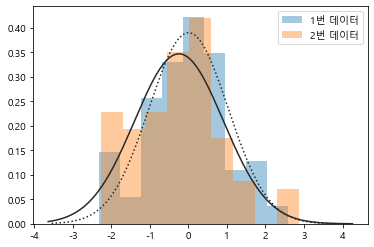

x1 의 표준 편차: 1.023166556423253
x2 의 표준 편차: 1.1504046612331784
바틀렛 등분산 검정: BartlettResult(statistic=1.3501923224367445, pvalue=0.2452444975574587)
플리그너 등분산 검정: FlignerResult(statistic=0.9052027045698615, pvalue=0.3413904947340573)
레빈 등분산 검정: LeveneResult(statistic=1.415236047318903, pvalue=0.23561368993788964)


In [3]:
import random
# 2개 데이터의 개수
N1 = 100
N2 = 100
# 2개 데이터의 표준 편차
sigma_1 = 1.0
sigma_2 = 1.2

random.seed(42)
x1 = sp.stats.norm(0, sigma_1).rvs(N1)
x2 = sp.stats.norm(0, sigma_2).rvs(N2)

ax = sns.distplot(x1, kde=False, fit=sp.stats.norm, label='1번 데이터')
ax = sns.distplot(x2, kde=False, fit=sp.stats.norm, label='2번 데이터')
ax.lines[0].set_linestyle(":")
plt.legend()
plt.show()

print("x1 의 표준 편차:", x1.std())
print("x2 의 표준 편차:", x2.std())

# 2개 데이터 집단의 분산 차이가 유의미한 것인지 확인
print("바틀렛 등분산 검정:", sp.stats.bartlett(x1, x2))
print("플리그너 등분산 검정:", sp.stats.fligner(x1, x2))
print("레빈 등분산 검정:", sp.stats.levene(x1, x2))